In [117]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import KBinsDiscretizer, StandardScaler, MinMaxScaler, PowerTransformer, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [11]:
df

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Score,CLTV,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,86,3239,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,67,2701,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,86,5372,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,84,5003,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,89,5340,Competitor had better devices
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,1,United States,California,Landers,92285,"34.341737, -116.539416",34.341737,-116.539416,Female,...,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No,0,45,5306,NaN
7039,6840-RESVB,1,United States,California,Adelanto,92301,"34.667815, -117.536183",34.667815,-117.536183,Male,...,One year,Yes,Mailed check,84.80,1990.5,No,0,59,2140,NaN
7040,2234-XADUH,1,United States,California,Amboy,92304,"34.559882, -115.637164",34.559882,-115.637164,Female,...,One year,Yes,Credit card (automatic),103.20,7362.9,No,0,71,5560,NaN
7041,4801-JZAZL,1,United States,California,Angelus Oaks,92305,"34.1678, -116.86433",34.167800,-116.864330,Female,...,Month-to-month,Yes,Electronic check,29.60,346.45,No,0,59,2793,NaN


In [9]:
for col in df.columns:
    print(f'{col} Value Counts = {df[col].value_counts()}')

CustomerID Value Counts = CustomerID
3668-QPYBK    1
9169-BSVIN    1
0206-OYVOC    1
6418-HNFED    1
8805-JNRAZ    1
             ..
6797-UCJHZ    1
5016-IBERQ    1
3003-CMDUU    1
5148-HKFIR    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
Count Value Counts = Count
1    7043
Name: count, dtype: int64
Country Value Counts = Country
United States    7043
Name: count, dtype: int64
State Value Counts = State
California    7043
Name: count, dtype: int64
City Value Counts = City
Los Angeles       305
San Diego         150
San Jose          112
Sacramento        108
San Francisco     104
                 ... 
Healdsburg          4
Jenner              4
Philo               4
Point Arena         4
Olympic Valley      4
Name: count, Length: 1129, dtype: int64
Zip Code Value Counts = Zip Code
90003    5
91436    5
91916    5
91913    5
91911    5
        ..
95303    4
95251    4
95250    4
95246    4
96146    4
Name: count, Length: 1652, dtype: int64
Lat Long Value Counts = Lat Long

In [13]:
df2 = pd.read_excel('Telco_customer_churn.xlsx', usecols=[
    # Target
    'Churn Value',
    'Churn Score',

    # Numerical
    'Tenure Months',
    'Monthly Charges',
    'Total Charges',

    # Categorical
    'Contract',
    'Payment Method',
    'Internet Service',
    'Online Security',
    'Tech Support',

    # Binary (treat as categorical)
    'Senior Citizen',
    'Partner',
    'Dependents',
    'Paperless Billing'
]
)

In [12]:
df.columns

Index(['CustomerID', 'Count', 'Country', 'State', 'City', 'Zip Code',
       'Lat Long', 'Latitude', 'Longitude', 'Gender', 'Senior Citizen',
       'Partner', 'Dependents', 'Tenure Months', 'Phone Service',
       'Multiple Lines', 'Internet Service', 'Online Security',
       'Online Backup', 'Device Protection', 'Tech Support', 'Streaming TV',
       'Streaming Movies', 'Contract', 'Paperless Billing', 'Payment Method',
       'Monthly Charges', 'Total Charges', 'Churn Label', 'Churn Value',
       'Churn Score', 'CLTV', 'Churn Reason'],
      dtype='object')

In [18]:
df2.sample(5)

,Senior Citizen,Partner,Dependents,Tenure Months,Internet Service,Online Security,Tech Support,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Value,Churn Score
1088,No,No,No,63,Fiber optic,No,No,One year,No,Bank transfer (automatic),99.90,6137,1,71
3462,Yes,Yes,No,59,Fiber optic,Yes,Yes,One year,Yes,Electronic check,94.05,5483.9,0,30
2274,No,No,No,1,No,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,0,80
1598,No,No,No,1,Fiber optic,No,No,Month-to-month,No,Mailed check,70.75,70.75,1,93
2723,No,Yes,Yes,45,No,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),24.65,1138.8,0,67


In [17]:
df2.shape

(7043, 14)

In [97]:
x = df2.drop(columns=['Churn Value', 'Churn Score'])
y = df2['Churn Value']
z = df2['Churn Score']

In [21]:
x.head(2)

,Senior Citizen,Partner,Dependents,Tenure Months,Internet Service,Online Security,Tech Support,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges
0,No,No,No,2,DSL,Yes,No,Month-to-month,Yes,Mailed check,53.85,108.15
1,No,No,Yes,2,Fiber optic,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Senior Citizen     7043 non-null   object 
 1   Partner            7043 non-null   object 
 2   Dependents         7043 non-null   object 
 3   Tenure Months      7043 non-null   int64  
 4   Internet Service   7043 non-null   object 
 5   Online Security    7043 non-null   object 
 6   Tech Support       7043 non-null   object 
 7   Contract           7043 non-null   object 
 8   Paperless Billing  7043 non-null   object 
 9   Payment Method     7043 non-null   object 
 10  Monthly Charges    7043 non-null   float64
 11  Total Charges      7043 non-null   object 
 12  Churn Value        7043 non-null   int64  
 13  Churn Score        7043 non-null   int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 770.5+ KB


In [39]:
df['Total Charges'] = pd.to_numeric(df['Total Charges'], errors='coerce')

Text(0.5, 1.0, 'Total Charges')

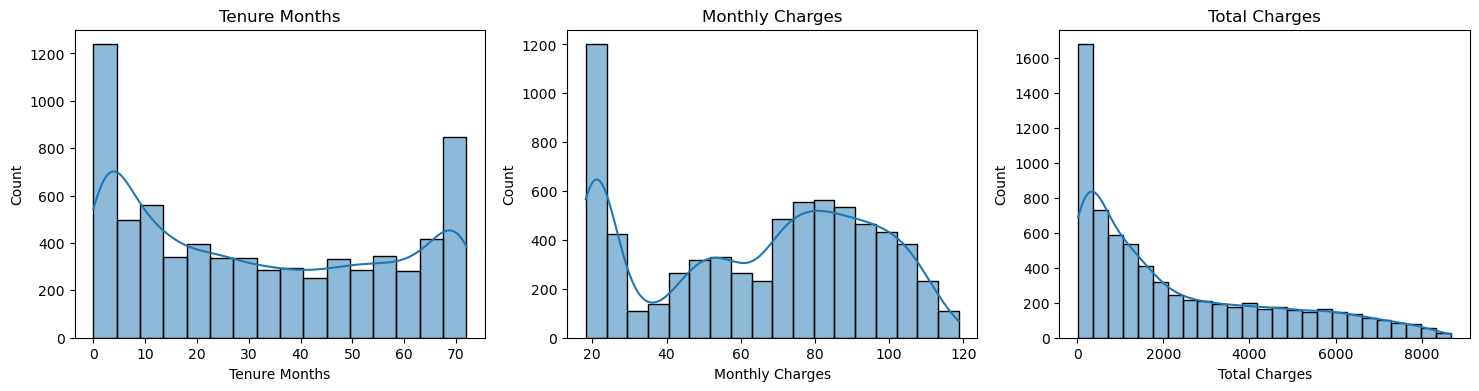

In [40]:
plt.figure(figsize=(18, 4))
plt.subplot(131)
sns.histplot(df['Tenure Months'], kde=True)
plt.title('Tenure Months')
plt.subplot(132)
sns.histplot(df['Monthly Charges'], kde=True)
plt.title('Monthly Charges')
plt.subplot(133)
sns.histplot(df['Total Charges'], kde=True)
plt.title('Total Charges')

In [43]:
pt = PowerTransformer(method='yoe-johnson')

In [98]:
x.head(2)

,Senior Citizen,Partner,Dependents,Tenure Months,Internet Service,Online Security,Tech Support,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges
0,No,No,No,2,DSL,Yes,No,Month-to-month,Yes,Mailed check,53.85,108.15
1,No,No,Yes,2,Fiber optic,No,No,Month-to-month,Yes,Electronic check,70.70,151.65


In [101]:
for bin_col in ['Senior Citizen','Partner','Dependents','Paperless Billing']:
    x[bin_col] = x[bin_col].replace({'Yes': 1, 'No': 0})

C:\Users\prady\AppData\Local\Temp\ipykernel_25308\1355982955.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  x[bin_col] = x[bin_col].replace({'Yes': 1, 'No': 0})


In [102]:
x['Total Charges'] = pd.to_numeric(x['Total Charges'], errors='coerce')

In [103]:
ct_n.fit_transform(x)

array([[-1.4954444411486996, -0.34266505070423847, -1.386090978578088,
        ..., 'Month-to-month', 1, 'Mailed check'],
       [-1.4954444411486996, 0.21354490631159703, -1.2488081905485162,
        ..., 'Month-to-month', 1, 'Electronic check'],
       [-0.9262870364473355, 1.147890874439329, -0.3527256075944146, ...,
        'Month-to-month', 1, 'Electronic check'],
       ...,
       [1.3421984579098853, 1.2609807283502927, 1.5658464439158803, ...,
        'One year', 1, 'Credit card (automatic)'],
       [-0.7251211853549013, -1.167240643688247, -0.8583928153219595,
        ..., 'Month-to-month', 1, 'Electronic check'],
       [1.2018960208524838, 1.3388633836795045, 1.4833697719784462, ...,
        'Two year', 1, 'Bank transfer (automatic)']], dtype=object)

In [104]:
x.head(2)

,Senior Citizen,Partner,Dependents,Tenure Months,Internet Service,Online Security,Tech Support,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges
0,0,0,0,2,DSL,Yes,No,Month-to-month,1,Mailed check,53.85,108.15
1,0,0,1,2,Fiber optic,No,No,Month-to-month,1,Electronic check,70.70,151.65


In [70]:
ct_n.fit_transform(x)

array([[-1.4954444411486996, -0.34266505070423847, -1.386090978578088,
        ..., 'Month-to-month', 'Yes', 'Mailed check'],
       [-1.4954444411486996, 0.21354490631159703, -1.2488081905485162,
        ..., 'Month-to-month', 'Yes', 'Electronic check'],
       [-0.9262870364473355, 1.147890874439329, -0.3527256075944146, ...,
        'Month-to-month', 'Yes', 'Electronic check'],
       ...,
       [1.3421984579098853, 1.2609807283502927, 1.5658464439158803, ...,
        'One year', 'Yes', 'Credit card (automatic)'],
       [-0.7251211853549013, -1.167240643688247, -0.8583928153219595,
        ..., 'Month-to-month', 'Yes', 'Electronic check'],
       [1.2018960208524838, 1.3388633836795045, 1.4833697719784462, ...,
        'Two year', 'Yes', 'Bank transfer (automatic)']], dtype=object)

In [105]:
ct_n = Pipeline([
    ('impute', SimpleImputer(strategy='mean')),
    ('numeric', PowerTransformer())
])

ct_c = Pipeline([
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('categorical', OneHotEncoder(sparse_output=False, drop='first'))
])

ct = ColumnTransformer([
    ('first', ct_n, [3, 10, 11]),
    ('second', ct_c, [4, 7, 9, 5, 6])
], remainder='passthrough')

pipe = Pipeline([
    ('preprocess', ct),
    ('model', DecisionTreeClassifier(random_state=42))
])


In [106]:
pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('first',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('numeric',
                                                                   PowerTransformer())]),
                                                  [3, 10, 11]),
                                                 ('second',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('categorical',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  [4, 7, 9, 5, 6])])),
                ('model', DecisionTreeClassifier(random_state=42))])

In [115]:
x_train, x_test, y_train, y_test , z_train, z_test = train_test_split(x, y, z, test_size=0.2, random_state=42)

In [108]:
x_train.head(2)

,Senior Citizen,Partner,Dependents,Tenure Months,Internet Service,Online Security,Tech Support,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges
2142,0,1,0,71,Fiber optic,No,No,One year,1,Credit card (automatic),98.65,6962.85
1623,0,0,0,16,Fiber optic,No,No,Month-to-month,1,Credit card (automatic),93.20,1573.70


In [109]:
pipe.fit(x_train, y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('first',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('numeric',
                                                                   PowerTransformer())]),
                                                  [3, 10, 11]),
                                                 ('second',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('categorical',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  [4, 7, 9, 5, 6])])),
                ('model', DecisionTreeClassifier(random_state=42))])

In [94]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5634 entries, 2142 to 860
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Senior Citizen     5634 non-null   int64  
 1   Partner            5634 non-null   int64  
 2   Dependents         5634 non-null   int64  
 3   Tenure Months      5634 non-null   int64  
 4   Internet Service   5634 non-null   object 
 5   Online Security    5634 non-null   object 
 6   Tech Support       5634 non-null   object 
 7   Contract           5634 non-null   object 
 8   Paperless Billing  5634 non-null   int64  
 9   Payment Method     5634 non-null   object 
 10  Monthly Charges    5634 non-null   float64
 11  Total Charges      5623 non-null   float64
dtypes: float64(2), int64(5), object(5)
memory usage: 572.2+ KB


In [100]:
x_train['Tech Support'].value_counts()

Tech Support
0                      2735
1                      1653
No internet service    1246
Name: count, dtype: int64

In [111]:
y_pred = pipe.predict(x_test)
accuracy_score(y_pred, y_test)

0.7366926898509581

In [113]:
np.mean(cross_val_score(pipe, x, y, scoring='accuracy', cv=10))

0.7364853320438428

In [114]:
pipe2 = Pipeline([
    ('preprocess', ct),
    ('model', LinearRegression())
])

In [116]:
pipe2.fit(x_train, z_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('first',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer()),
                                                                  ('numeric',
                                                                   PowerTransformer())]),
                                                  [3, 10, 11]),
                                                 ('second',
                                                  Pipeline(steps=[('impute',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('categorical',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  [4, 7, 9, 5, 6])])),
                ('model', LinearRegression())])

In [118]:
z_pred = pipe2.predict(x_test)

r2_score(z_test, z_pred)

0.12163825579117382

In [121]:
import pickle

pickle.dump(pipe,open('pipeline.pkl', 'wb'))